In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
import scipy.stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

In [38]:
# Collecte et nettoyage des données 
# Charger les données 
data= pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')
# afficher les données 
data.head()
data.dropna(inplace=True)
print(data.describe())

# verifier sil i y a des doublons 
print("Nombre de lignes avant nettoyage :", data.shape[0])
data.drop_duplicates(inplace=True)
print("Nombre de lignes après nettoyage :", data.shape[0])

print(data.describe())

# Conversion de la Colonne Date
data['Date'] = pd.to_datetime(data['Date'])

# Vérification des Valeurs Manquantes 
print(data.isnull().sum())

               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.

               SNo                           Date          High           Low  \
count  2991.000000                           2991   2991.000000   2991.000000   
mean   1496.000000  2017-06-02 23:59:59.000000256   6893.326038   6486.009539   
min       1.000000            2013-04-29 23:59:59     74.561096     65.526001   
25%     748.500000            2015-05-17 11:59:59    436.179001    422.879486   
50%    1496.000000            2017-06-02 23:59:59   2387.610107   2178.500000   
75%    2243.500000            2019-06-20 11:59:59   8733.926948   8289.800459   
max    2991.000000            2021-07-06 23:59:59  64863.098908  62208.964366   
std     863.571653                            NaN  11642.832456  10869.032130   

               Open         Close        Volume     Marketcap  
count   2991.000000   2991.000000  2.991000e+03  2.991000e+03  
mean    6700.146240   6711.290443  1.090633e+10  1.208761e+11  
min       68.504997     68.431000  0.000000e+00  7.784112e+08  
25%      430.4

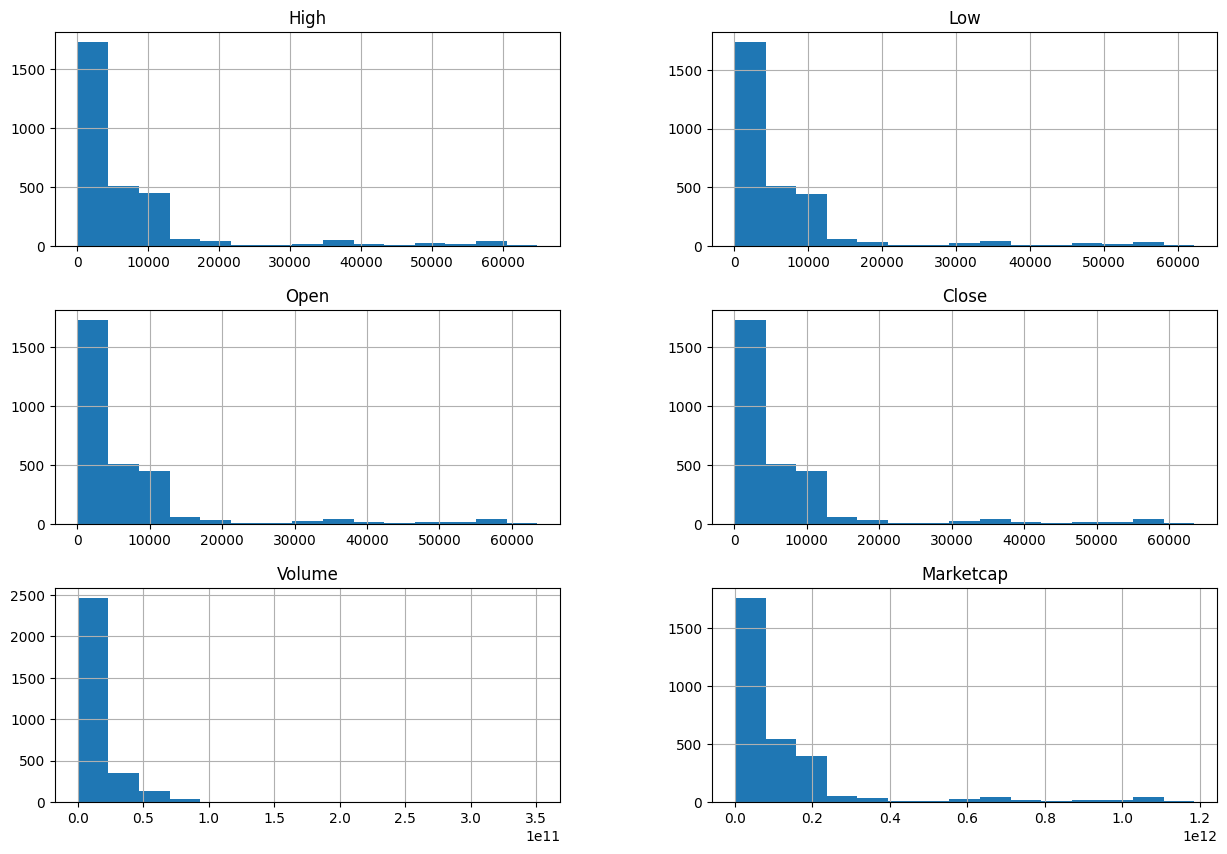

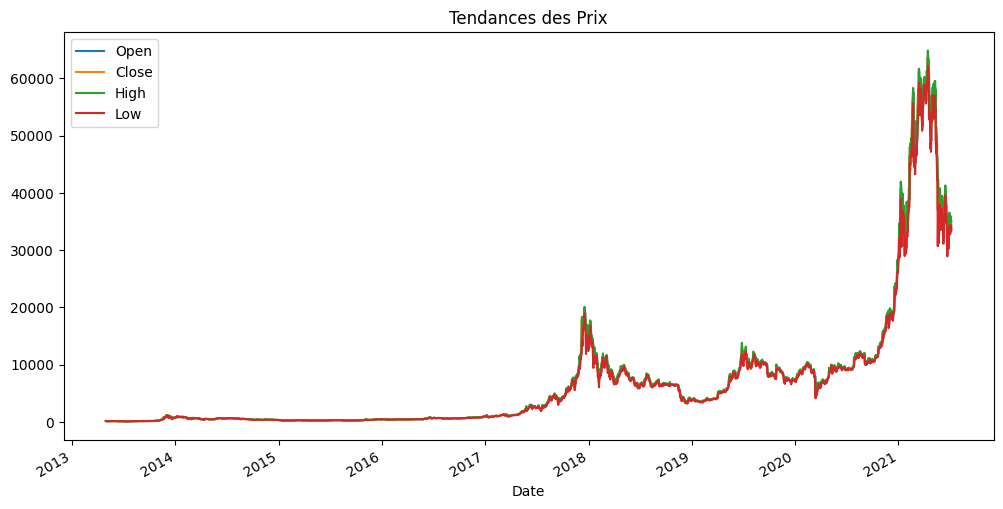

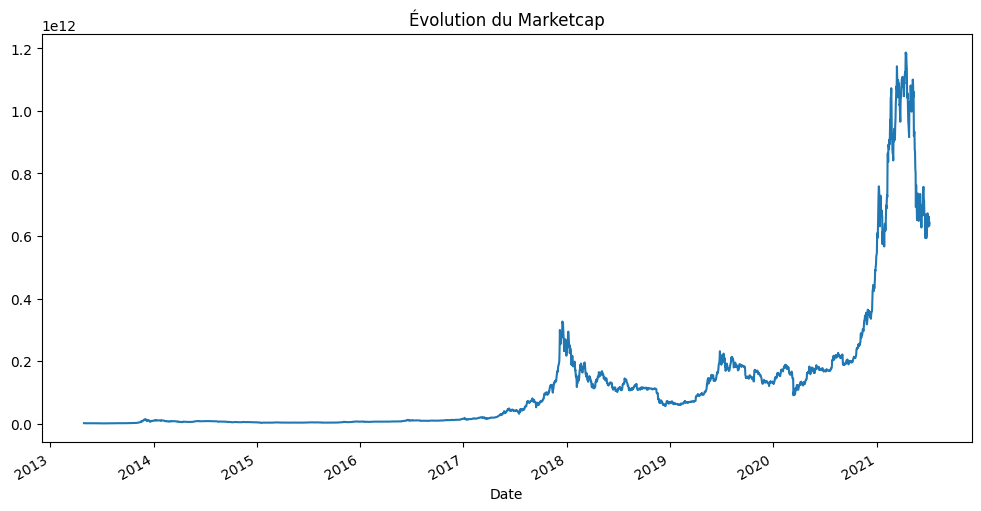

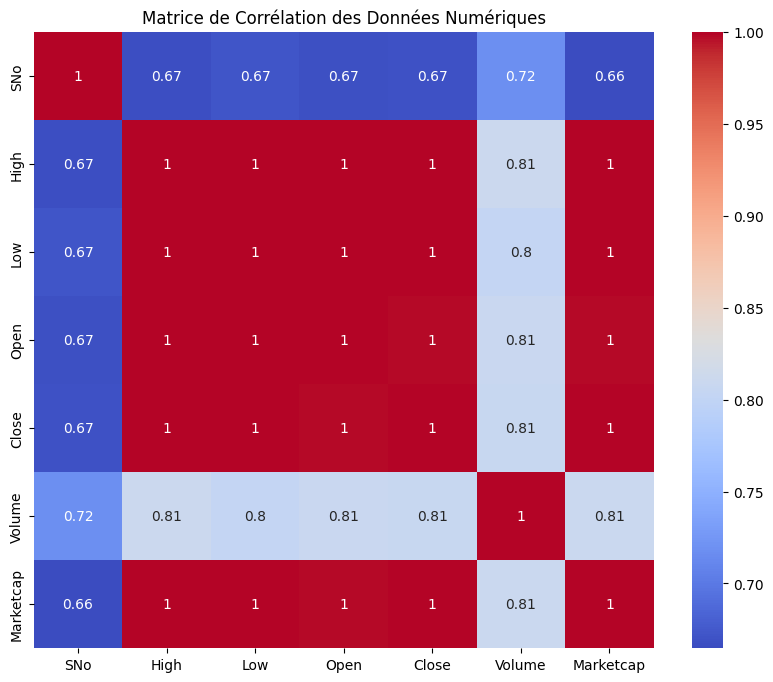

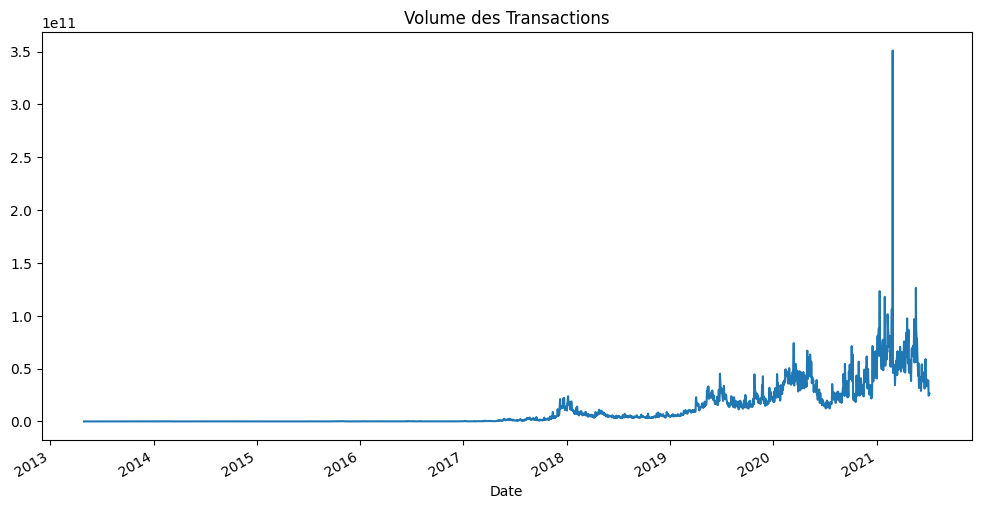

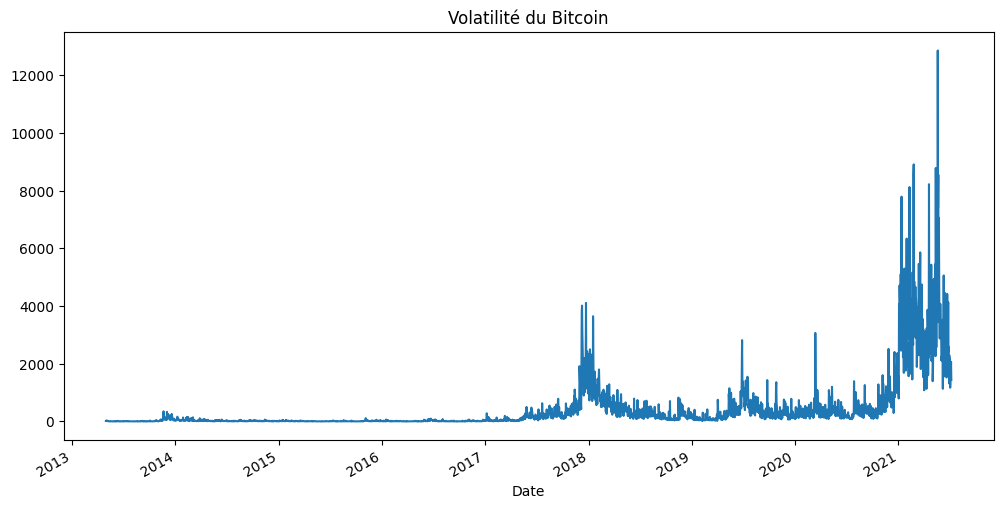

In [39]:
# Analyse Exploratoire des Données (EDA)

# Statistiques Descriptives :
print(data.describe())

# Visualisez la distribution des données numériques.
data.hist(['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], bins=15, figsize=(15, 10))
plt.show()

# Tendances Temporelles :
data.set_index('Date', inplace=True)
data[['Open', 'Close', 'High', 'Low']].plot(figsize=(12, 6))
plt.title('Tendances des Prix')
plt.show()

data['Marketcap'].plot(figsize=(12, 6))
plt.title('Évolution du Marketcap')
plt.show()

#  uniquement les colonnes numériques pour la corrélation
cols_numeriques = data.select_dtypes(include=[np.number]).columns
data_numerique = data[cols_numeriques]

# Calcul de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerique.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Données Numériques')
plt.show()

# Analyse de volume. 
data['Volume'].plot(figsize=(12, 6))
plt.title('Volume des Transactions')
plt.show()

# Volatilité (différence entre High et Low)
data['Volatility'] = data['High'] - data['Low']
data['Volatility'].plot(figsize=(12, 6))
plt.title('Volatilité du Bitcoin')
plt.show()

In [40]:
 # Preparation des données pour la modelisation 
# Séparation en Ensembles d'Entraînement et de Test

# Supposons que 'data' est votre DataFrame avec les données nécessaires déjà chargées

# Séparation en ensembles d'entraînement et de test
X = data[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Normalisation
# Création d'une instance de MinMaxScaler
scaler = MinMaxScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversion des tableaux normalisés en DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Ensemble d'entraînement normalisé :
       Open      High       Low    Volume  Marketcap
0  0.004963  0.004841  0.004985  0.000212   0.004193
1  0.008189  0.008046  0.008311  0.000041   0.005789
2  0.067392  0.068731  0.061787  0.009283   0.057558
3  0.003291  0.003189  0.003314  0.000063   0.002547
4  0.151937  0.163152  0.151831  0.020765   0.146999
Ensemble de test normalisé :
       Open      High       Low    Volume  Marketcap
0  0.017121  0.017615  0.017293  0.000605   0.015572
1  0.124733  0.128447  0.125086  0.014804   0.117611
2  0.002824  0.002710  0.002840  0.000043   0.002273
3  0.149705  0.149012  0.149861  0.093731   0.145733
4  0.008631  0.008588  0.008730  0.000041   0.005774
Statistiques de l'ensemble d'entraînement normalisé :
              Open         High          Low       Volume    Marketcap
count  2392.000000  2392.000000  2392.000000  2392.000000  2392.000000
mean      0.107881     0.110026     0.106176     0.031865     0.104263
std       0.183434     0.187790 

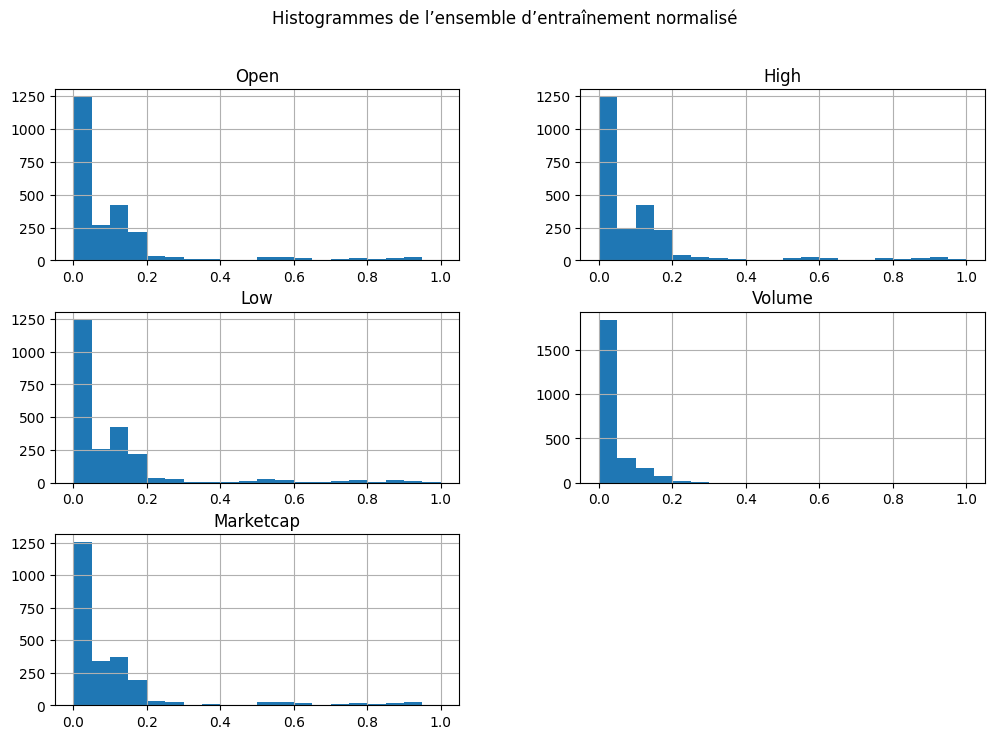

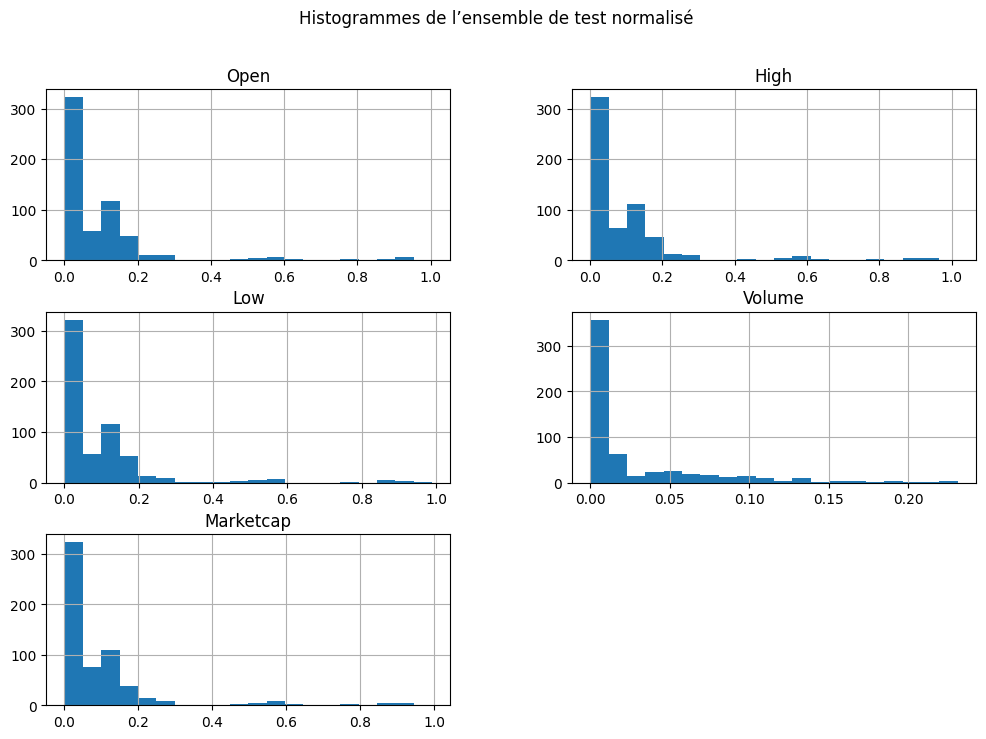

In [42]:
# Affichage des premières lignes
print("Ensemble d'entraînement normalisé :")
print(X_train_scaled_df.head())

print("Ensemble de test normalisé :")
print(X_test_scaled_df.head())

# Affichage des statistiques descriptives
print("Statistiques de l'ensemble d'entraînement normalisé :")
print(X_train_scaled_df.describe())

print("Statistiques de l'ensemble de test normalisé :")
print(X_test_scaled_df.describe())

# Histogrammes pour l'ensemble d'entraînement normalisé
X_train_scaled_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogrammes de l’ensemble d’entraînement normalisé')
plt.show()

# Histogrammes pour l'ensemble de test normalisé
X_test_scaled_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogrammes de l’ensemble de test normalisé')
plt.show()


In [43]:
# Redimensionnement pour le LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_train_scaled = y_train_scaled.reshape(-1)
y_test_scaled = y_test_scaled.reshape(-1)

Epoch 1/100
60/60 [==============================] - 5s 20ms/step - loss: 0.8378 - val_loss: 0.6310
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5212 - val_loss: 0.4423
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3975 - val_loss: 0.3599
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3324 - val_loss: 0.3056
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.2857 - val_loss: 0.2634
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.2463 - val_loss: 0.2278
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.2130 - val_loss: 0.1956
Epoch 8/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1830 - val_loss: 0.1676
Epoch 9/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1567 - val_loss: 0.1429
Epoch 10/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1332 - val_loss: 0.1209
Epoch 11

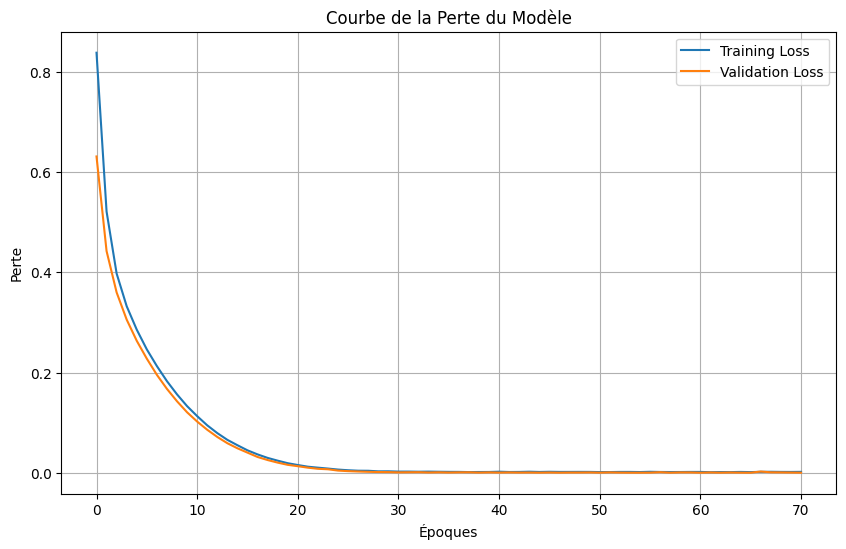

In [44]:
# Construction du modèle LSTM avec régularisation
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]),
         kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    Dropout(0.5),
    LSTM(50, return_sequences=False),
    Dropout(0.5),
    Dense(1)
])

# Compilation du modèle avec un taux d'apprentissage initial ajusté
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callback d'arrêt anticipé pour éviter le surajustement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle avec validation_split pour suivre la perte de validation
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Visualisation de la perte d'entraînement et de validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la Perte du Modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.show()

In [45]:

y_pred = model.predict(X_test_scaled)

# Ajustement des longueurs pour les métriques
y_test_true = y_test[-len(y_pred):]

# Calcul des métriques
mse = mean_squared_error(y_test_true, y_pred)
mae = mean_absolute_error(y_test_true, y_pred)
r2 = r2_score(y_test_true, y_pred)

# Affichage des métriques
print("Erreur Quadratique Moyenne (MSE):", mse)
print("Erreur Absolue Moyenne (MAE):", mae)
print("Coefficient de Détermination (R²):", r2)



19/19 [==============================] - 2s 2ms/step
Erreur Quadratique Moyenne (MSE): 133560945.85074459
Erreur Absolue Moyenne (MAE): 5961.483338025907
Coefficient de Détermination (R²): -0.36252276024778274


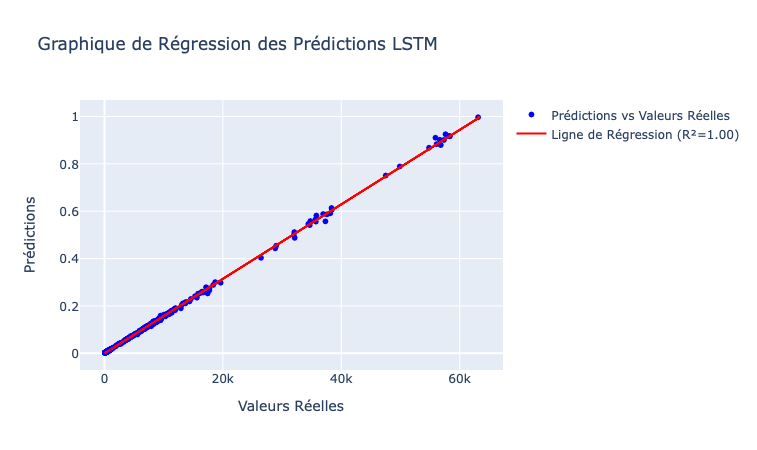

In [47]:

init_notebook_mode(connected=True)

# Assurez-vous que 'y_test_true' et 'y_pred' sont déjà définis dans votre espace de noms

# Calculer les points pour la ligne de régression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_test_true, y_pred.ravel())
line = slope * np.array(y_test_true) + intercept

# Créer un graphique de régression avec un nuage de points et une ligne de régression
trace0 = go.Scatter(
    x=y_test_true,
    y=y_pred.ravel(),
    mode='markers',
    name='Prédictions vs Valeurs Réelles',
    marker=dict(color='blue')
)

trace1 = go.Scatter(
    x=y_test_true,
    y=line,
    mode='lines',
    name=f'Ligne de Régression (R²={r_value**2:.2f})',
    line=dict(color='red')
)

# Mise en page du graphique
layout = go.Layout(
    title='Graphique de Régression des Prédictions LSTM',
    xaxis=dict(title='Valeurs Réelles'),
    yaxis=dict(title='Prédictions'),
    showlegend=True
)

# Créer la figure et ajouter les traces
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Afficher le graphique
iplot(fig)